# 1. Import and Load

In [113]:
# upload files
from google.colab import files
uploaded = files.upload()

Saving EVDatabase.csv to EVDatabase (1).csv


In [114]:
#loading packages

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings 

%matplotlib inline
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv('Cheapestelectriccars-EVDatabase.csv')
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€33,400","£28,995"
2,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,"€83,750","£74,635"
3,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,574","£142,400"
4,Nissan e-NV200 Evalia,Battery Electric Vehicle | 36 kWh,14.0 sec,123 km/h,165 km,218 Wh/km,170 km/h,Front Wheel Drive,7,"€43,433","£30,255"


# 2. Data Cleaning

Sort table by vehicles name

In [116]:
df = df.sort_values('Name', ignore_index=True)

Adding Brand column base on Name column

In [117]:
df['Brand'] = df['Name'].copy()

for index, row in df.iterrows():
  split = str(df['Brand'][index]).split()
  df['Brand'][index] = split[0]
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Brand
0,Aiways U5,Battery Electric Vehicle | 63 kWh,7.5 sec,150 km/h,335 km,188 Wh/km,350 km/h,Front Wheel Drive,5,"€39,657",NaN,Aiways
1,Audi Q4 Sportback e-tron 35,Battery Electric Vehicle | 51.5 kWh,9.0 sec,160 km/h,295 km,175 Wh/km,410 km/h,Rear Wheel Drive,5,"€43,900","£42,250",Audi
2,Audi Q4 Sportback e-tron 40,Battery Electric Vehicle | 76.6 kWh,8.5 sec,160 km/h,425 km,180 Wh/km,520 km/h,Rear Wheel Drive,5,"€49,500",NaN,Audi
3,Audi Q4 Sportback e-tron 50 quattro,Battery Electric Vehicle | 76.6 kWh,6.2 sec,180 km/h,400 km,192 Wh/km,490 km/h,All Wheel Drive,5,"€55,600","£52,870",Audi
4,Audi Q4 e-tron 35,Battery Electric Vehicle | 51.5 kWh,9.0 sec,160 km/h,280 km,184 Wh/km,390 km/h,Rear Wheel Drive,5,"€41,900","£40,750",Audi


Cleaning values for all column for data usage

In [118]:
Subtitle=[]
for item in df['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
df['Subtitle']=Subtitle

TopSpeed=[]
for item in df['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
df['TopSpeed']=TopSpeed

Range=[]
for item in df['Range']:
    Range+=[int(item.replace(' km', ''))]
df['Range']=Range

Efficiency=[]
for item in df['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km', ''))]
df['Efficiency']=Efficiency

FastChargeSpeed=[]
for item in df['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df['FastChargeSpeed']=FastChargeSpeed

Acceleration=[]
for item in df['Acceleration']:
    Acceleration+=[float(item.replace(' sec', ''))]
df['Acceleration']=Acceleration

# fill null values before replacing
df = df.fillna('0')

# Convert Euro to USD (1 Euro = 0.98 USD)
PriceinGermany=[]
for item in df['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',','')) * 0.98]
df['PriceinGermany'] = PriceinGermany

# Convert Pound to USD (1 Pound = 1.12 USD)
PriceinUK=[]
for item in df['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',','')) * 1.12]
df['PriceinUK']=PriceinUK

df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Brand
0,Aiways U5,63.0,7.5,150,335,188,350,Front Wheel Drive,5,38863.86,0.0,Aiways
1,Audi Q4 Sportback e-tron 35,51.5,9.0,160,295,175,410,Rear Wheel Drive,5,43022.00,47320.0,Audi
2,Audi Q4 Sportback e-tron 40,76.6,8.5,160,425,180,520,Rear Wheel Drive,5,48510.00,0.0,Audi
3,Audi Q4 Sportback e-tron 50 quattro,76.6,6.2,180,400,192,490,All Wheel Drive,5,54488.00,59214.4,Audi
4,Audi Q4 e-tron 35,51.5,9.0,160,280,184,390,Rear Wheel Drive,5,41062.00,45640.0,Audi


Changing columns names and add units

In [119]:
df.columns = ['Name', 'Battery Size (kWh)', 'Acceleration (0-100km/h)', 'Top_Speed (km/h)', 'Range (km)', 'Efficiency (Wh/km)',
              'Fast_Charge_Speed (km/h)', 'Drive', 'Number_Of_Seats', 'Price_In_Germany (USD)', 'Price_In_UK (USD)','Brand']
df.head()

,Name,Battery Size (kWh),Acceleration (0-100km/h),Top_Speed (km/h),Range (km),Efficiency (Wh/km),Fast_Charge_Speed (km/h),Drive,Number_Of_Seats,Price_In_Germany (USD),Price_In_UK (USD),Brand
0,Aiways U5,63.0,7.5,150,335,188,350,Front Wheel Drive,5,38863.86,0.0,Aiways
1,Audi Q4 Sportback e-tron 35,51.5,9.0,160,295,175,410,Rear Wheel Drive,5,43022.00,47320.0,Audi
2,Audi Q4 Sportback e-tron 40,76.6,8.5,160,425,180,520,Rear Wheel Drive,5,48510.00,0.0,Audi
3,Audi Q4 Sportback e-tron 50 quattro,76.6,6.2,180,400,192,490,All Wheel Drive,5,54488.00,59214.4,Audi
4,Audi Q4 e-tron 35,51.5,9.0,160,280,184,390,Rear Wheel Drive,5,41062.00,45640.0,Audi


Combine Price In Germany and Price In UK into a new Average price column

In [120]:
df['Average_Price (USD)'] = df['Price_In_Germany (USD)']

# Take average if both prices are available, if not choose the available one
for index, row in df.iterrows():
  if df['Price_In_Germany (USD)'][index] == 0.0:
    df['Average_Price (USD)'][index] = df['Price_In_UK (USD)'][index]
  elif df['Price_In_UK (USD)'][index] == 0.0:
    df['Average_Price (USD)'][index] = df['Price_In_Germany (USD)'][index]
  else:
    df['Average_Price (USD)'][index] = (df['Price_In_Germany (USD)'][index] + df['Price_In_UK (USD)'][index]) / 2
df = df.drop(['Price_In_Germany (USD)', 'Price_In_UK (USD)'], axis = 1)

df.head()

,Name,Battery Size (kWh),Acceleration (0-100km/h),Top_Speed (km/h),Range (km),Efficiency (Wh/km),Fast_Charge_Speed (km/h),Drive,Number_Of_Seats,Brand,Average_Price (USD)
0,Aiways U5,63.0,7.5,150,335,188,350,Front Wheel Drive,5,Aiways,38863.86
1,Audi Q4 Sportback e-tron 35,51.5,9.0,160,295,175,410,Rear Wheel Drive,5,Audi,45171.00
2,Audi Q4 Sportback e-tron 40,76.6,8.5,160,425,180,520,Rear Wheel Drive,5,Audi,48510.00
3,Audi Q4 Sportback e-tron 50 quattro,76.6,6.2,180,400,192,490,All Wheel Drive,5,Audi,56851.20
4,Audi Q4 e-tron 35,51.5,9.0,160,280,184,390,Rear Wheel Drive,5,Audi,43351.00


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      186 non-null    object 
 1   Battery Size (kWh)        186 non-null    float64
 2   Acceleration (0-100km/h)  186 non-null    float64
 3   Top_Speed (km/h)          186 non-null    int64  
 4   Range (km)                186 non-null    int64  
 5   Efficiency (Wh/km)        186 non-null    int64  
 6   Fast_Charge_Speed (km/h)  186 non-null    int64  
 7   Drive                     186 non-null    object 
 8   Number_Of_Seats           186 non-null    int64  
 9   Brand                     186 non-null    object 
 10  Average_Price (USD)       186 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 16.1+ KB


In [122]:
df.describe()

,Battery Size (kWh),Acceleration (0-100km/h),Top_Speed (km/h),Range (km),Efficiency (Wh/km),Fast_Charge_Speed (km/h),Number_Of_Seats,Average_Price (USD)
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,67.649462,7.493011,181.021505,352.392473,193.413978,510.053763,5.150538,62832.917151
std,25.496427,3.056337,43.457709,127.111578,32.470954,266.737035,0.963622,39592.473361
min,16.700000,2.100000,123.000000,95.000000,104.000000,100.000000,2.000000,20454.000000
25%,49.100000,5.125000,150.000000,270.000000,168.000000,290.000000,5.000000,38136.717500
50%,68.000000,7.300000,167.000000,350.000000,187.000000,440.000000,5.000000,51307.200000
75%,83.700000,9.000000,200.000000,408.750000,213.750000,710.000000,5.000000,69822.602500
max,200.000000,19.100000,410.000000,970.000000,281.000000,1390.000000,7.000000,291550.000000


# 3. Data Analysis

Rank by Efficency:

In [123]:
df_eff=df.copy()
df_eff=df_eff.sort_values('Efficiency (Wh/km)', ignore_index=True)
df_eff.head(10)

,Name,Battery Size (kWh),Acceleration (0-100km/h),Top_Speed (km/h),Range (km),Efficiency (Wh/km),Fast_Charge_Speed (km/h),Drive,Number_Of_Seats,Brand,Average_Price (USD)
0,Lightyear One,60.0,10.0,150,550,104,520,All Wheel Drive,5,Lightyear,291550.00
1,Tesla Model 3 Standard Range Plus,50.0,5.6,225,340,147,680,Rear Wheel Drive,5,Tesla,44298.80
2,Fiat 500e Hatchback 42 kWh,37.3,9.0,150,250,149,420,Front Wheel Drive,4,Fiat,26941.60
3,Hyundai IONIQ 6 Standard Range 2WD,58.0,8.0,190,360,150,880,Rear Wheel Drive,5,Hyundai,46690.00
4,Tesla Model 3 Standard Range Plus LFP,51.0,5.6,225,340,150,570,Rear Wheel Drive,5,Tesla,44298.80
5,Fiat 500e Cabrio,37.3,9.0,150,245,152,410,Front Wheel Drive,4,Fiat,29895.60
6,Fiat 500e 3+1,37.3,9.0,150,245,152,410,Front Wheel Drive,4,Fiat,28968.80
7,Hyundai IONIQ 6 Long Range 2WD,77.4,7.0,190,485,153,1270,Rear Wheel Drive,5,Hyundai,51100.00
8,Hyundai IONIQ Electric,38.3,9.7,165,250,153,220,Front Wheel Drive,5,Hyundai,34429.50
9,Tesla Model 3 Long Range Dual Motor,70.0,4.4,233,455,154,570,All Wheel Drive,5,Tesla,62802.25


Rank by lowest price:

In [124]:
df_price = df.copy()
df_price = df_price.sort_values('Average_Price (USD)', ignore_index=True)
df_price.head(10)

,Name,Battery Size (kWh),Acceleration (0-100km/h),Top_Speed (km/h),Range (km),Efficiency (Wh/km),Fast_Charge_Speed (km/h),Drive,Number_Of_Seats,Brand,Average_Price (USD)
0,Smart EQ forfour,16.7,12.7,130,95,176,100,Rear Wheel Drive,4,Smart,20454.00
1,Dacia Spring Electric,25.0,19.1,125,155,161,170,Front Wheel Drive,4,Dacia,22099.00
2,Volkswagen e-Up!,32.3,11.9,130,205,158,170,Front Wheel Drive,4,Volkswagen,22847.09
3,Smart EQ fortwo coupe,16.7,11.6,130,100,167,100,Rear Wheel Drive,2,Smart,23196.60
4,Smart EQ fortwo cabrio,16.7,11.9,130,95,176,100,Rear Wheel Drive,2,Smart,26149.20
5,Fiat 500e Hatchback 42 kWh,37.3,9.0,150,250,149,420,Front Wheel Drive,4,Fiat,26941.60
6,Renault Twingo Electric,21.3,12.6,135,130,164,100,Rear Wheel Drive,4,Renault,27440.00
7,Fiat 500e Hatchback 24 kWh,21.3,9.0,135,135,158,230,Front Wheel Drive,4,Fiat,28532.70
8,Fiat 500e 3+1,37.3,9.0,150,245,152,410,Front Wheel Drive,4,Fiat,28968.80
9,Sono Sion,47.0,9.0,140,260,181,310,Front Wheel Drive,5,Sono,29301.02


Rank by Efficiency and Price:

In [125]:
df_eff_price = df.copy()

df_eff_price['Rank_Eff'] = df_eff_price['Efficiency (Wh/km)'].rank(method='dense')
df_eff_price['Rank_Price'] = df_eff_price['Average_Price (USD)'].rank(method='dense')

df_eff_price['Eff_Price'] = df_eff_price['Rank_Eff']
for index, row in df_eff_price.iterrows():
    df_eff_price['Eff_Price'] = df_eff_price['Rank_Eff'] + df_eff_price['Rank_Price']

df_eff_price = df_eff_price.sort_values('Eff_Price', ignore_index=True)
df_eff_price.head(10)

,Name,Battery Size (kWh),Acceleration (0-100km/h),Top_Speed (km/h),Range (km),Efficiency (Wh/km),Fast_Charge_Speed (km/h),Drive,Number_Of_Seats,Brand,Average_Price (USD),Rank_Eff,Rank_Price,Eff_Price
0,Fiat 500e Hatchback 42 kWh,37.3,9.0,150,250,149,420,Front Wheel Drive,4,Fiat,26941.60,3.0,6.0,9.0
1,Fiat 500e 3+1,37.3,9.0,150,245,152,410,Front Wheel Drive,4,Fiat,28968.80,5.0,9.0,14.0
2,Volkswagen e-Up!,32.3,11.9,130,205,158,170,Front Wheel Drive,4,Volkswagen,22847.09,11.0,3.0,14.0
3,Dacia Spring Electric,25.0,19.1,125,155,161,170,Front Wheel Drive,4,Dacia,22099.00,13.0,2.0,15.0
4,Fiat 500e Cabrio,37.3,9.0,150,245,152,410,Front Wheel Drive,4,Fiat,29895.60,5.0,13.0,18.0
5,Fiat 500e Hatchback 24 kWh,21.3,9.0,135,135,158,230,Front Wheel Drive,4,Fiat,28532.70,11.0,8.0,19.0
6,Smart EQ fortwo coupe,16.7,11.6,130,100,167,100,Rear Wheel Drive,2,Smart,23196.60,19.0,4.0,23.0
7,Renault Twingo Electric,21.3,12.6,135,130,164,100,Rear Wheel Drive,4,Renault,27440.00,16.0,7.0,23.0
8,Mini Cooper SE,28.9,7.3,150,185,156,260,Front Wheel Drive,4,Mini,30485.00,9.0,16.0,25.0
9,Opel Corsa-e,45.0,8.1,150,275,164,370,Front Wheel Drive,5,Opel,29408.40,16.0,11.0,27.0


**Conclusion:** The combination of ranking Efficiency and Price result in the small and inexpensive cars since the size alone can dictate the efficiency score and the price. These car are great for small road city driving or short commute but not ideal otherwise.

Rank by range:

In [126]:
df_range = df.copy()
df_range = df_range.sort_values('Range (km)', ascending=False, ignore_index=True)
df_range.head(10)

,Name,Battery Size (kWh),Acceleration (0-100km/h),Top_Speed (km/h),Range (km),Efficiency (Wh/km),Fast_Charge_Speed (km/h),Drive,Number_Of_Seats,Brand,Average_Price (USD)
0,Tesla Roadster,200.0,2.1,410,970,206,920,All Wheel Drive,4,Tesla,211190.00
1,Tesla Cybertruck Tri Motor,200.0,3.0,210,750,267,710,All Wheel Drive,7,Tesla,74830.00
2,Lucid Air Dream Edition R,118.0,2.9,270,695,170,880,All Wheel Drive,5,Lucid,213640.00
3,Lucid Air Grand Touring,112.0,3.2,270,665,168,840,All Wheel Drive,5,Lucid,171500.00
4,Lucid Air Dream Edition P,118.0,2.7,270,655,180,830,All Wheel Drive,5,Lucid,213640.00
5,Mercedes EQS 450+,107.8,6.2,210,640,168,960,Rear Wheel Drive,5,Mercedes,109799.34
6,Mercedes EQS 450 4MATIC,107.8,5.6,210,615,175,920,All Wheel Drive,5,Mercedes,108911.32
7,Mercedes EQS 580 4MATIC,107.8,4.3,210,610,177,800,All Wheel Drive,5,Mercedes,130809.21
8,Mercedes EQS 500 4MATIC,107.8,4.8,210,605,178,900,All Wheel Drive,5,Mercedes,120689.94
9,Tesla Model S Dual Motor,95.0,3.2,250,585,163,810,All Wheel Drive,5,Tesla,101850.00


Rank by range and Price:

In [127]:
df_range_price = df.copy()

df_range_price['Rank_Range'] = df_range_price['Range (km)'].rank(ascending=False, method='dense')
df_range_price['Rank_Price'] = df_range_price['Average_Price (USD)'].rank(method='dense')

df_range_price['Range_Price'] = df_range_price['Rank_Range']
for index, row in df_range_price.iterrows():
    df_range_price['Range_Price'] = df_range_price['Rank_Range'] + df_range_price['Rank_Price']

df_range_price = df_range_price.sort_values('Range_Price', ignore_index=True)
df_range_price.head(10)

,Name,Battery Size (kWh),Acceleration (0-100km/h),Top_Speed (km/h),Range (km),Efficiency (Wh/km),Fast_Charge_Speed (km/h),Drive,Number_Of_Seats,Brand,Average_Price (USD),Rank_Range,Rank_Price,Range_Price
0,MG MG5 EV Long Range,57.0,7.7,185,340,168,340,Front Wheel Drive,5,MG,29674.40,44.0,12.0,56.0
1,Fiat 500e Hatchback 42 kWh,37.3,9.0,150,250,149,420,Front Wheel Drive,4,Fiat,26941.60,60.0,6.0,66.0
2,Renault Zoe ZE50 R110,52.0,11.4,135,315,165,230,Front Wheel Drive,5,Renault,30680.30,49.0,17.0,66.0
3,Opel Corsa-e,45.0,8.1,150,275,164,370,Front Wheel Drive,5,Opel,29408.40,56.0,11.0,67.0
4,MG MG4 Electric 51 kWh,50.8,7.7,160,300,169,340,Rear Wheel Drive,5,MG,30232.30,52.0,15.0,67.0
5,Volkswagen ID.3 Pro,58.0,9.6,160,350,166,440,Rear Wheel Drive,5,Volkswagen,33062.75,42.0,25.0,67.0
6,Sono Sion,47.0,9.0,140,260,181,310,Front Wheel Drive,5,Sono,29301.02,58.0,10.0,68.0
7,Volkswagen e-Up!,32.3,11.9,130,205,158,170,Front Wheel Drive,4,Volkswagen,22847.09,65.0,3.0,68.0
8,Peugeot e-208,45.0,8.1,150,275,164,370,Front Wheel Drive,5,Peugeot,30166.50,56.0,14.0,70.0
9,Fiat 500e 3+1,37.3,9.0,150,245,152,410,Front Wheel Drive,4,Fiat,28968.80,61.0,9.0,70.0


**Conclusion:** The combination of ranking Range and Price result in the best bang for your bucks car in my opinion. Since range depends on how efficency the car is and its battery size, this list is the most valueable car you can buy.

Rank by top speed:

In [128]:
df_speed = df.copy()
df_speed = df_speed.sort_values('Top_Speed (km/h)', ascending=False, ignore_index=True)
df_speed.head(10)

,Name,Battery Size (kWh),Acceleration (0-100km/h),Top_Speed (km/h),Range (km),Efficiency (Wh/km),Fast_Charge_Speed (km/h),Drive,Number_Of_Seats,Brand,Average_Price (USD)
0,Tesla Roadster,200.0,2.1,410,970,206,920,All Wheel Drive,4,Tesla,211190.00
1,Tesla Model S Plaid,90.0,2.1,322,535,168,800,All Wheel Drive,5,Tesla,128853.90
2,Lucid Air Dream Edition P,118.0,2.7,270,655,180,830,All Wheel Drive,5,Lucid,213640.00
3,Lucid Air Grand Touring,112.0,3.2,270,665,168,840,All Wheel Drive,5,Lucid,171500.00
4,Lucid Air Dream Edition R,118.0,2.9,270,695,170,880,All Wheel Drive,5,Lucid,213640.00
5,Tesla Model X Plaid,90.0,2.6,262,455,198,680,All Wheel Drive,7,Tesla,119473.90
6,Tesla Model 3 Performance,76.0,3.3,261,470,162,790,All Wheel Drive,5,Tesla,62288.80
7,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,Porsche,171165.26
8,Porsche Taycan Turbo,83.7,3.2,260,400,209,840,All Wheel Drive,4,Porsche,139859.44
9,Kia EV6 GT,77.4,3.5,260,395,196,920,All Wheel Drive,5,Kia,64980.30


Rank by Acceleration:

In [129]:
df_acc = df.copy()
df_acc = df_acc.sort_values('Acceleration (0-100km/h)', ignore_index=True)
df_acc.head(10)

,Name,Battery Size (kWh),Acceleration (0-100km/h),Top_Speed (km/h),Range (km),Efficiency (Wh/km),Fast_Charge_Speed (km/h),Drive,Number_Of_Seats,Brand,Average_Price (USD)
0,Tesla Roadster,200.0,2.1,410,970,206,920,All Wheel Drive,4,Tesla,211190.00
1,Tesla Model S Plaid,90.0,2.1,322,535,168,800,All Wheel Drive,5,Tesla,128853.90
2,Tesla Model X Plaid,90.0,2.6,262,455,198,680,All Wheel Drive,7,Tesla,119473.90
3,Lucid Air Dream Edition P,118.0,2.7,270,655,180,830,All Wheel Drive,5,Lucid,213640.00
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,Porsche,171165.26
5,Lucid Air Dream Edition R,118.0,2.9,270,695,170,880,All Wheel Drive,5,Lucid,213640.00
6,Porsche Taycan Turbo S Cross Turismo,83.7,2.9,250,380,220,790,All Wheel Drive,4,Porsche,170345.14
7,Tesla Cybertruck Tri Motor,200.0,3.0,210,750,267,710,All Wheel Drive,7,Tesla,74830.00
8,Lucid Air Grand Touring,112.0,3.2,270,665,168,840,All Wheel Drive,5,Lucid,171500.00
9,Tesla Model S Dual Motor,95.0,3.2,250,585,163,810,All Wheel Drive,5,Tesla,101850.00


Rank by Top Speed, Acceleration and Price:

In [130]:
df_acc_speed = df.copy()

df_acc_speed['Rank_Acc'] = df_acc_speed['Acceleration (0-100km/h)'].rank(method='dense')
df_acc_speed['Rank_Speed'] = df_acc_speed['Top_Speed (km/h)'].rank(ascending=False, method='dense')
df_acc_speed['Rank_Price'] = df_acc_speed['Average_Price (USD)'].rank(method='dense')

df_acc_speed['Acc_Speed'] = df_acc_speed['Rank_Acc']
for index, row in df_acc_speed.iterrows():
    df_acc_speed['Acc_Speed'] = df_acc_speed['Rank_Acc'] + df_acc_speed['Rank_Speed'] + df_acc_speed['Rank_Price']

df_acc_speed = df_acc_speed.sort_values('Acc_Speed', ignore_index=True)
df_acc_speed.head(10)

,Name,Battery Size (kWh),Acceleration (0-100km/h),Top_Speed (km/h),Range (km),Efficiency (Wh/km),Fast_Charge_Speed (km/h),Drive,Number_Of_Seats,Brand,Average_Price (USD),Rank_Acc,Rank_Speed,Rank_Price,Acc_Speed
0,MG MG5 EV Long Range,57.0,7.7,185,340,168,340,Front Wheel Drive,5,MG,29674.40,45.0,20.0,12.0,77.0
1,Mini Cooper SE,28.9,7.3,150,185,156,260,Front Wheel Drive,4,Mini,30485.00,41.0,27.0,16.0,84.0
2,MG MG4 Electric 51 kWh,50.8,7.7,160,300,169,340,Rear Wheel Drive,5,MG,30232.30,45.0,24.0,15.0,84.0
3,Opel Corsa-e,45.0,8.1,150,275,164,370,Front Wheel Drive,5,Opel,29408.40,49.0,27.0,11.0,87.0
4,Fiat 500e Hatchback 42 kWh,37.3,9.0,150,250,149,420,Front Wheel Drive,4,Fiat,26941.60,56.0,27.0,6.0,89.0
5,Peugeot e-208,45.0,8.1,150,275,164,370,Front Wheel Drive,5,Peugeot,30166.50,49.0,27.0,14.0,90.0
6,Fiat 500e 3+1,37.3,9.0,150,245,152,410,Front Wheel Drive,4,Fiat,28968.80,56.0,27.0,9.0,92.0
7,MG ZS EV,42.5,8.2,140,220,193,260,Front Wheel Drive,5,MG,30232.30,50.0,30.0,15.0,95.0
8,Fiat 500e Hatchback 24 kWh,21.3,9.0,135,135,158,230,Front Wheel Drive,4,Fiat,28532.70,56.0,31.0,8.0,95.0
9,Sono Sion,47.0,9.0,140,260,181,310,Front Wheel Drive,5,Sono,29301.02,56.0,30.0,10.0,96.0


**Conclusion:** The combination result in a list of most affordable but still relatively fast car. We can see that the Accelation and Top Speed are strongly correlate.

Rank by Acceleration, Top speed, Range, Efficiency, fast charge speed and Price:

In [131]:
df_rank = df.copy()

df_rank['Rank_Acc'] = df_rank['Acceleration (0-100km/h)'].rank(method='dense')
df_rank['Rank_Speed'] = df_rank['Top_Speed (km/h)'].rank(ascending=False, method='dense')
df_rank['Rank_Eff'] = df_rank['Efficiency (Wh/km)'].rank(method='dense')
df_rank['Rank_Range'] = df_rank['Range (km)'].rank(ascending=False, method='dense')
df_rank['Rank_Charge'] = df_rank['Fast_Charge_Speed (km/h)'].rank(ascending=False, method='dense')
df_rank['Rank_Price'] = df_rank['Average_Price (USD)'].rank(method='dense')

df_rank['rank'] = df_rank['Rank_Acc']
for index, row in df_rank.iterrows():
    df_rank['rank'] = df_rank['Rank_Acc'] + df_rank['Rank_Speed'] + df_rank['Rank_Eff'] + df_rank['Rank_Range']  + df_rank['Rank_Charge'] + df_rank['Rank_Price']

df_rank = df_rank.sort_values('rank', ignore_index=True)
df_rank.head(10)

,Name,Battery Size (kWh),Acceleration (0-100km/h),Top_Speed (km/h),Range (km),Efficiency (Wh/km),Fast_Charge_Speed (km/h),Drive,Number_Of_Seats,Brand,Average_Price (USD),Rank_Acc,Rank_Speed,Rank_Eff,Rank_Range,Rank_Charge,Rank_Price,rank
0,Tesla Model 3 Long Range Dual Motor,76.0,4.4,233,490,155,820,All Wheel Drive,5,Tesla,52488.8,17.0,11.0,8.0,18.0,22.0,89.0,165.0
1,Hyundai IONIQ 6 Long Range 2WD,77.4,7.0,190,485,153,1270,Rear Wheel Drive,5,Hyundai,51100.0,40.0,19.0,6.0,19.0,2.0,85.0,171.0
2,Tesla Model 3 Standard Range Plus,50.0,5.6,225,340,147,680,Rear Wheel Drive,5,Tesla,44298.8,28.0,13.0,2.0,44.0,30.0,62.0,179.0
3,Tesla Model 3 Standard Range Plus LFP,51.0,5.6,225,340,150,570,Rear Wheel Drive,5,Tesla,44298.8,28.0,13.0,4.0,44.0,36.0,62.0,187.0
4,Tesla Model 3 Performance,76.0,3.3,261,470,162,790,All Wheel Drive,5,Tesla,62288.8,8.0,5.0,14.0,21.0,25.0,117.0,190.0
5,Hyundai IONIQ 6 Long Range AWD,74.0,5.1,190,470,157,1230,All Wheel Drive,5,Hyundai,59500.0,24.0,19.0,10.0,21.0,3.0,115.0,192.0
6,Lucid Air Touring,85.0,3.4,250,530,160,1390,All Wheel Drive,5,Lucid,96950.0,9.0,7.0,12.0,16.0,1.0,151.0,196.0
7,MG MG5 EV Long Range,57.0,7.7,185,340,168,340,Front Wheel Drive,5,MG,29674.4,45.0,20.0,20.0,44.0,58.0,12.0,199.0
8,Hyundai IONIQ 6 Standard Range 2WD,58.0,8.0,190,360,150,880,Rear Wheel Drive,5,Hyundai,46690.0,48.0,19.0,4.0,40.0,16.0,73.0,200.0
9,Fiat 500e Hatchback 42 kWh,37.3,9.0,150,250,149,420,Front Wheel Drive,4,Fiat,26941.6,56.0,27.0,3.0,60.0,50.0,6.0,202.0


**Conclusion:** This combination result in a list of most valueable car in every catergory that matters for this dataset. We can see that Tesla still taking over top 5 despite the fact that Hyndai IONIQ 6 is not available in 2022. Fast charge speed is very interesting aspect since most low-price car doesn't support fast charging speed which could be a deal breaker for some people. There obviously more aspect to considering when buying an electric car that not contributed in this list like Tax Incentive, Charging Station, Brand Reputation, Autonomic techonology, etc. 

# 4. Data Virtualization


Distributed Graph for each column

<function matplotlib.pyplot.show(*args, **kw)>

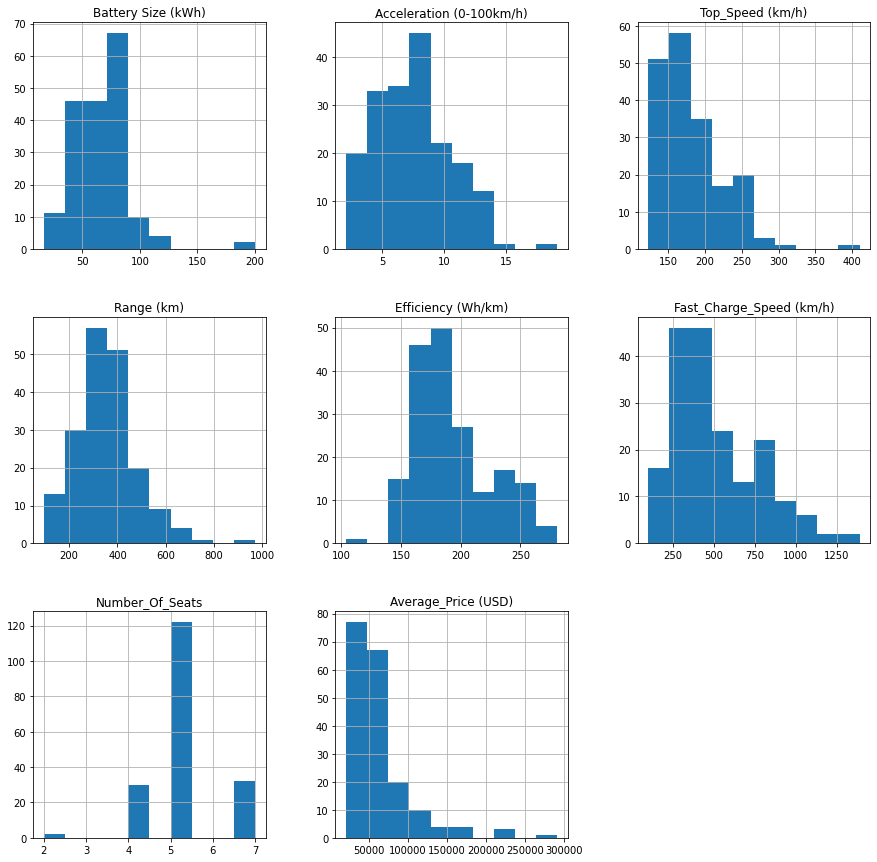

In [132]:
df.iloc[:,:].hist(figsize=(15,15))
plt.show

Relationship between each pair features

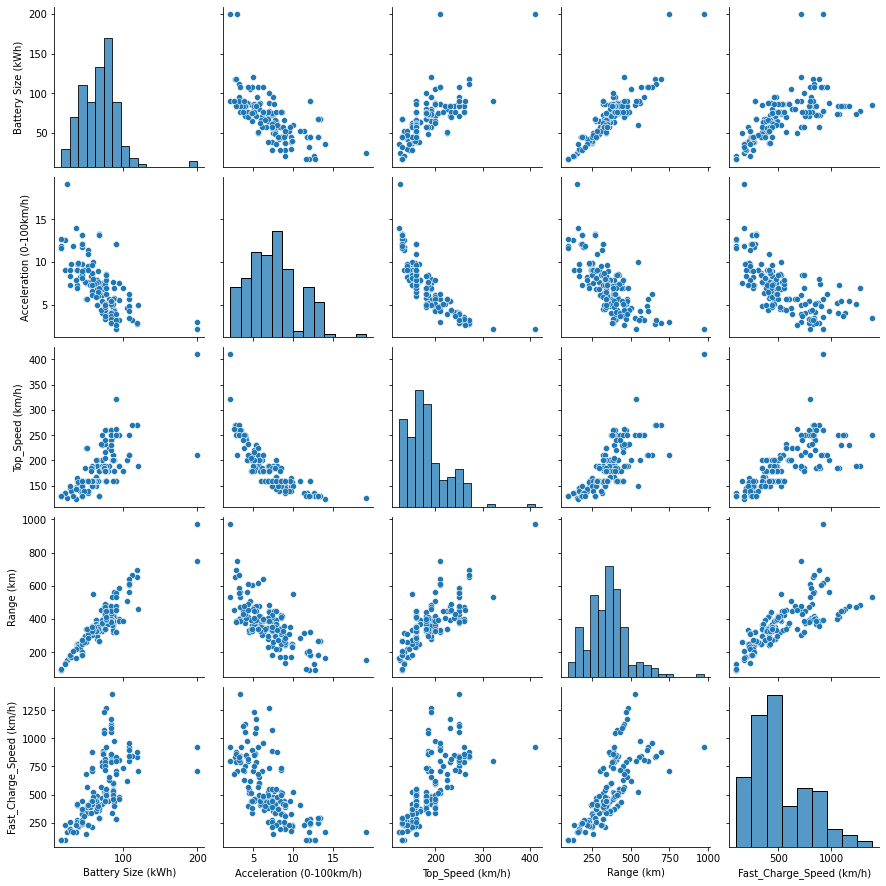

In [133]:
sns.pairplot(df[["Battery Size (kWh)","Acceleration (0-100km/h)","Top_Speed (km/h)","Range (km)","Fast_Charge_Speed (km/h)"]])

Correlation between different feature as a heatmap

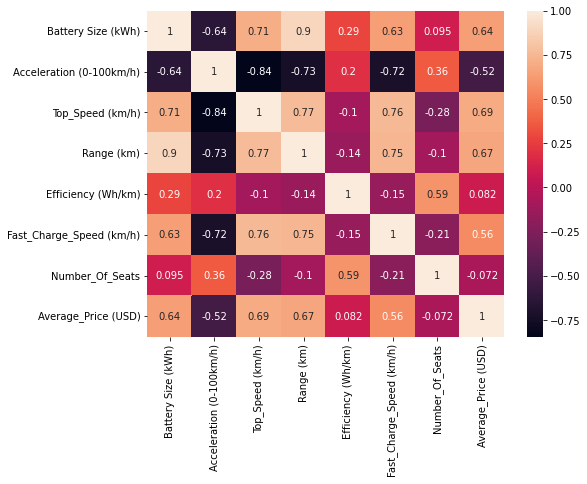

In [134]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

Scatter Plot to pick car base on accelation, range and price 

In [135]:
fig = px.scatter(df, x = 'Range (km)', y='Acceleration (0-100km/h)',hover_data=['Name'],
                color = 'Average_Price (USD)', trendline='ols', trendline_scope = 'overall')

fig.update_layout(
    title={
        'text': 'Eletric Cars Scatter Plot based on Acceleration and Range',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'bottom'},
    legend = {'orientation': 'h'}
)

fig.show()